# ARIMA FOR STOCK PRICE PREDICTION (TIME SERIES)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read Data from CSV file And Store It IN DATAFRAME
df = pd.read_csv('NSE-TATAGLOBAL.csv')

#print TOP 5 RECORD
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2019-01-04,210.60,214.90,210.00,213.50,213.80,1213181.0,2583.05
1,2019-01-03,214.95,215.35,209.90,210.55,210.05,2096553.0,4433.50
2,2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31
3,2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
4,2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09


In [3]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2.100000e+03,2100.000000
mean,151.818810,154.145190,149.361619,151.584762,151.561595,2.327641e+06,3919.237300
std,49.350352,50.127368,48.597083,49.420366,49.401844,2.081348e+06,4547.900775
min,81.100000,82.800000,80.000000,81.000000,80.950000,3.961000e+04,37.040000
25%,120.750000,122.675000,119.000000,120.600000,120.550000,1.147086e+06,1462.815000
50%,142.250000,144.300000,140.425000,142.000000,141.950000,1.768579e+06,2552.165000
75%,159.000000,161.500000,156.825000,158.712500,158.762500,2.795726e+06,4548.082500
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [4]:
# Data Frame Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2100 non-null   object 
 1   Open                  2100 non-null   float64
 2   High                  2100 non-null   float64
 3   Low                   2100 non-null   float64
 4   Last                  2100 non-null   float64
 5   Close                 2100 non-null   float64
 6   Total Trade Quantity  2100 non-null   float64
 7   Turnover (Lacs)       2100 non-null   float64
dtypes: float64(7), object(1)
memory usage: 131.4+ KB


In [5]:
# DATA CLEANING 
# CHECK ANY NULL VALUE IS PRESENT OR NOT
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [6]:
# CHECK ANY VALUE IS MISSING OR NOT
df.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [7]:
# Convert Date Column data type Object to Year-Month-day
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')

#setting index as date
df.index = df['Date']

df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2019-01-04,2019-01-04,210.60,214.90,210.00,213.50,213.80,1213181.0,2583.05
2019-01-03,2019-01-03,214.95,215.35,209.90,210.55,210.05,2096553.0,4433.50
2019-01-02,2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31
2019-01-01,2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
2018-12-31,2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09


In [8]:
# SORT DATA FRAME BY INDEX ASENDING ORDER
df = df.sort_index()

print('AFTER SORTING BY DATE(INDEX) ASC ORDER')
df.head()

AFTER SORTING BY DATE(INDEX) ASC ORDER


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2010-07-21,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98


In [9]:
new_data = pd.DataFrame(index=df.index)
new_data['Close'] = df['Close']

new_data.head()

,Close
Date,
2010-07-21,121.55
2010-07-22,120.90
2010-07-23,120.65
2010-07-26,117.60
2010-07-27,118.65


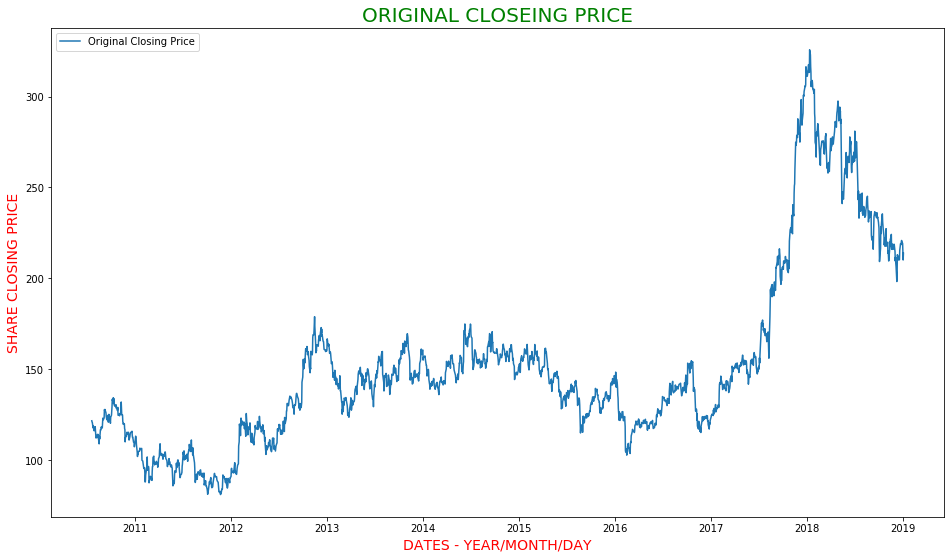

In [10]:
from pandas.plotting import register_matplotlib_converters

pd.plotting.register_matplotlib_converters()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(new_data['Close'], label='Original Closing Price')

ax.set_xlabel('DATES - YEAR/MONTH/DAY',fontsize=14, color='r')
ax.set_ylabel('SHARE CLOSING PRICE',fontsize=14, color='r')
ax.set_title('ORIGINAL CLOSEING PRICE', fontsize=20, color='g')
ax.legend()

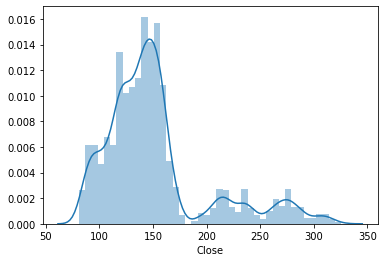

In [11]:
sns.distplot( new_data["Close"] )

### IT IS STATIONARY OR NOT?


### IF NOT STATIONARY WE CAN NOT PERFORM TIME SERIES ANLYSIS

### Stationary means mean, variance and covariance is constant over periods.

## CHECKING STATIONARY USING MEAN AND VARIENCE

In [12]:
X = new_data['Close'].values

split = round(len(X) / 2)

X1, X2 = X[0:split], X[split:]

mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()

print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

print('BOTH MEANS AND BOTH VARIENCE DOES NOT HAVE SAME VALUE SO IT IS NON STATIONARY DATA')

mean1=128.053810, mean2=175.069381
variance1=625.203685, variance2=3148.324460
BOTH MEANS AND BOTH VARIENCE DOES NOT HAVE SAME VALUE SO IT IS NON STATIONARY DATA


# CHECKING STATIONARY USING ROLLING STATISTICS

In [13]:
# determining ROLLING STATISTICS

rollingmean = new_data['Close'].rolling(window=30).mean()

rollingstd = new_data['Close'].rolling(window=30).std()

#print(rollingmean, rollingstd)

MEAN AND STANDARD DEVIATION IS NOT CONSTANT SO DATA IS NOT STATIONARY


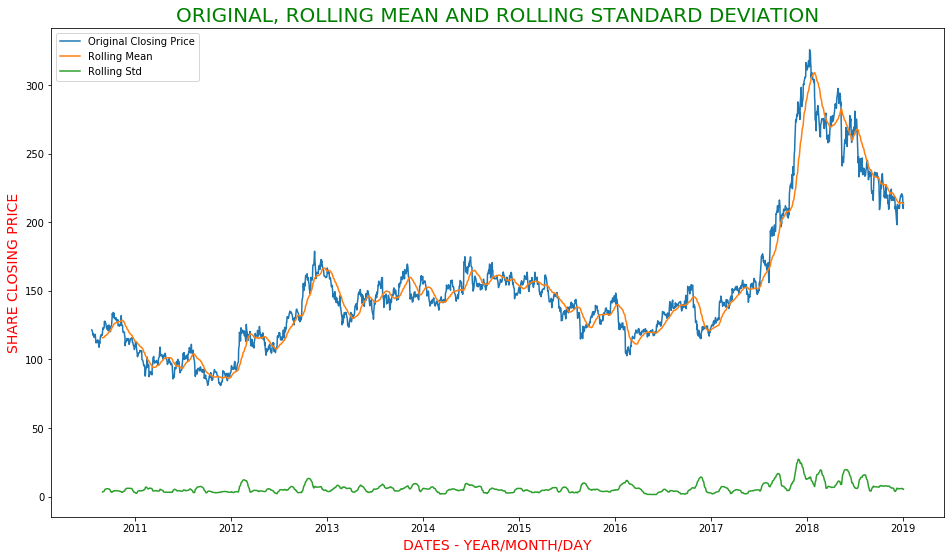

In [14]:
from pandas.plotting import register_matplotlib_converters

pd.plotting.register_matplotlib_converters()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(new_data['Close'], label='Original Closing Price')
ax.plot(rollingmean, label='Rolling Mean')
ax.plot(rollingstd, label='Rolling Std ')

ax.set_xlabel('DATES - YEAR/MONTH/DAY',fontsize=14, color='r')
ax.set_ylabel('SHARE CLOSING PRICE',fontsize=14, color='r')
ax.set_title('ORIGINAL, ROLLING MEAN AND ROLLING STANDARD DEVIATION', fontsize=20, color='g')
ax.legend()

print('MEAN AND STANDARD DEVIATION IS NOT CONSTANT SO DATA IS NOT STATIONARY')

## CHECKING STATIONARY USING AUGMENTED DICKEY-FULLER TEST (UNIT ROOT TEST)

In [15]:
# PERFORM DICKEY-FULLER TEST
from statsmodels.tsa.stattools import adfuller

print('RESULT OF DICKEY-FULLER TEST')
# AIC - Akaike Information Criterion 
# Akaike Information Critera (AIC) is a widely used measure of a statistical model. 
# It basically quantifies 1) the goodness of fit and 2) the simplicity/parsimony of the model into a single statistic.
dftest = adfuller(new_data['Close'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statictics','p-value','lags Used', 'No Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

RESULT OF DICKEY-FULLER TEST
Test Statictics           -1.129517
p-value                    0.703158
lags Used                 16.000000
No Observations Used    2083.000000
Critical Value (1%)       -3.433493
Critical Value (5%)       -2.862929
Critical Value (10%)      -2.567509
dtype: float64


Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

## DATA IS NOT STATIONARY BECAUSE IT DOES NOT FOLLOW THE RULE OF NULL HYPOTHISIS

In [16]:
#Estimated trend

new_data_logscale = np.log(new_data)

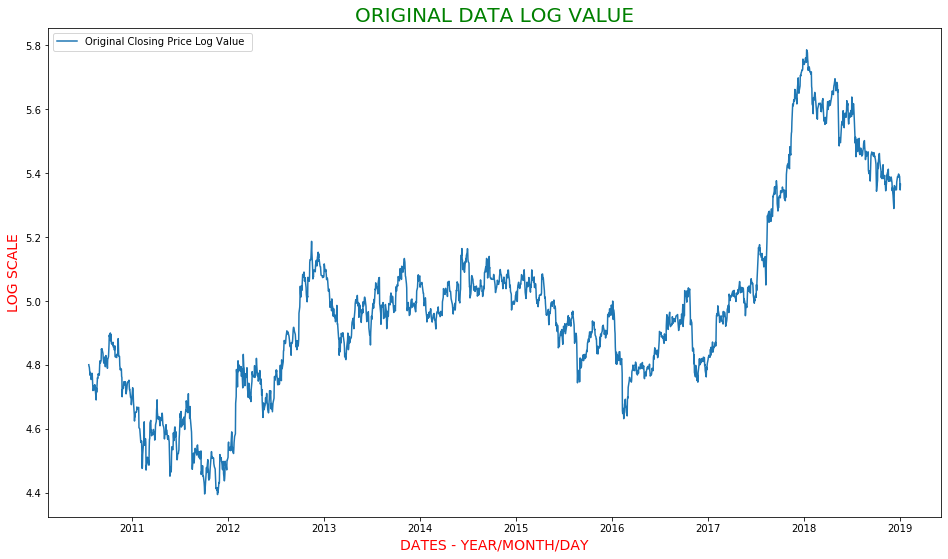

In [17]:
from pandas.plotting import register_matplotlib_converters

pd.plotting.register_matplotlib_converters()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(new_data_logscale, label='Original Closing Price Log Value ')

ax.set_xlabel('DATES - YEAR/MONTH/DAY',fontsize=14, color='r')
ax.set_ylabel('LOG SCALE',fontsize=14, color='r')
ax.set_title('ORIGINAL DATA LOG VALUE', fontsize=20, color='g')
ax.legend()

# CHECKING STATIONARY USING MEAN AND VARIENCE USING LOG VALUE

In [18]:
X = new_data_logscale['Close'].values

split = round(len(X) / 2)

X1, X2 = X[0:split], X[split:]

mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()

print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

print('NOW BOTH MEANS AND BOTH VARIENCE VALUE ARE NEARER TO EACH OTHER So IT IS LIKE STATIONARY DATA')

mean1=4.832385, mean2=5.119293
variance1=0.041257, variance2=0.086889
NOW BOTH MEANS AND BOTH VARIENCE VALUE ARE NEARER TO EACH OTHER So IT IS LIKE STATIONARY DATA


# Determining Moving Average USING LOG VALUE

In [19]:
# determining MOVING AVERAGE USING LOG VALUE

movingaverage = new_data_logscale['Close'].rolling(window=30).mean()

movingstd = new_data_logscale['Close'].rolling(window=30).std()

#print(movingaverage, movingstd)

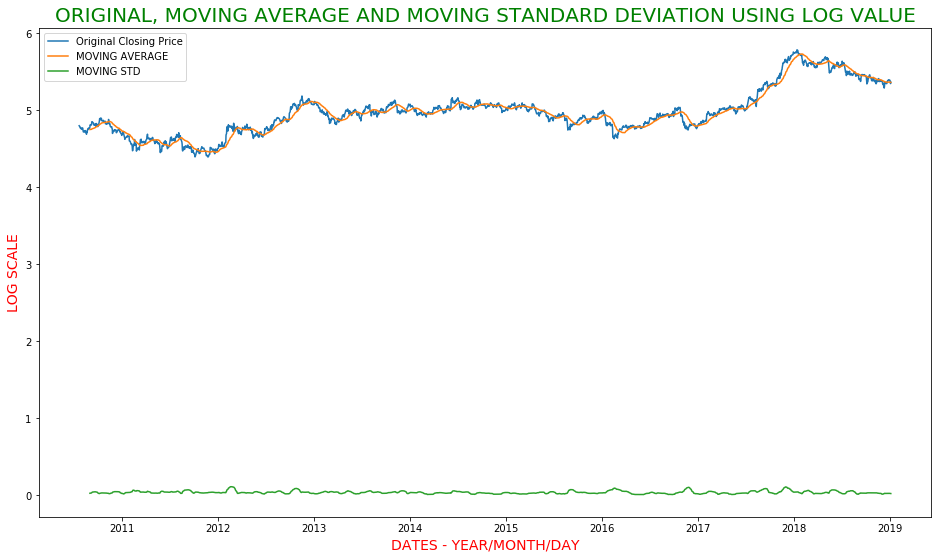

In [20]:
from pandas.plotting import register_matplotlib_converters

pd.plotting.register_matplotlib_converters()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(new_data_logscale['Close'], label='Original Closing Price')
ax.plot(movingaverage, label='MOVING AVERAGE')
ax.plot(movingstd, label='MOVING STD ')

ax.set_xlabel('DATES - YEAR/MONTH/DAY',fontsize=14, color='r')
ax.set_ylabel('LOG SCALE',fontsize=14, color='r')
ax.set_title('ORIGINAL, MOVING AVERAGE AND MOVING STANDARD DEVIATION USING LOG VALUE', fontsize=20, color='g')
ax.legend()

In [21]:
# PERFORM DICKEY-FULLER TEST
from statsmodels.tsa.stattools import adfuller

print('RESULT OF DICKEY-FULLER TEST')
# Akaike Information Critera (AIC) is a widely used measure of a statistical model. 
# It basically quantifies 1) the goodness of fit and 2) the simplicity/parsimony of the model into a single statistic.
dftest = adfuller(new_data_logscale['Close'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statictics','p-value','lags Used', 'No Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

RESULT OF DICKEY-FULLER TEST
Test Statictics           -1.393746
p-value                    0.585271
lags Used                  0.000000
No Observations Used    2099.000000
Critical Value (1%)       -3.433469
Critical Value (5%)       -2.862918
Critical Value (10%)      -2.567504
dtype: float64


In [22]:
# PERIOD IS 1 (2nd value - 1st Value) i.e. 146 - 266 = 120 like this
#INTEGRATED OF ORDER 1, denoted by d(difference) ARIMA MODEL
price_diff = new_data_logscale.diff(periods=1)

price_diff.head()

,Close
Date,
2010-07-21,NaN
2010-07-22,-0.005362
2010-07-23,-0.002070
2010-07-26,-0.025605
2010-07-27,0.008889


In [23]:
#REMOVING NAN

price_diff = price_diff[1:] 
price_diff.head()

,Close
Date,
2010-07-22,-0.005362
2010-07-23,-0.002070
2010-07-26,-0.025605
2010-07-27,0.008889
2010-07-28,-0.003377


# CHECKING STATIONARITY

In [24]:
# PERFORM DICKEY-FULLER TEST
from statsmodels.tsa.stattools import adfuller

print('RESULT OF DICKEY-FULLER TEST')
# AIC - Akaike Information Criterion 
dftest = adfuller(price_diff['Close'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statictics','p-value','lags Used', 'No Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

RESULT OF DICKEY-FULLER TEST
Test Statictics          -19.853521
p-value                    0.000000
lags Used                  5.000000
No Observations Used    2093.000000
Critical Value (1%)       -3.433478
Critical Value (5%)       -2.862922
Critical Value (10%)      -2.567506
dtype: float64


## DATA IS STATIONARY P VALUE IS 0.0000

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


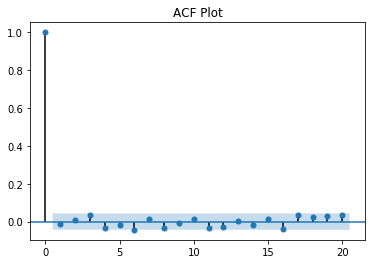

In [25]:
# CHECKING STATIONARITY USING ACF(AutoCorrelation Function) PLOT
from statsmodels.graphics.tsaplots import plot_acf

acf = plot_acf(price_diff, lags = 20)
plt.title("ACF Plot")
acf.show()

#price_diff1 = price_diff[:40]
#plot_acf(price_diff1)


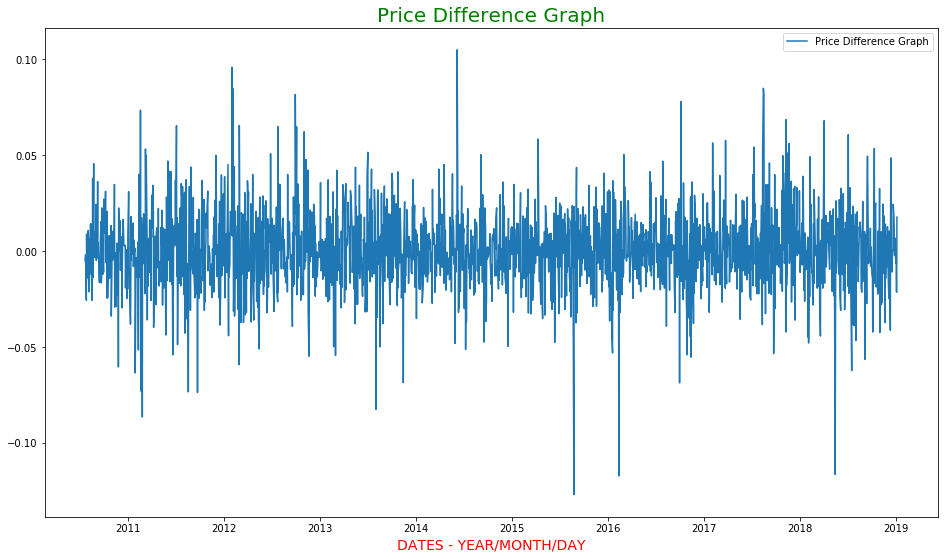

<Figure size 1152x576 with 0 Axes>

In [26]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

plt.figure(figsize=(16,8))
ax.plot(price_diff,label='Price Difference Graph')

ax.set_xlabel('DATES - YEAR/MONTH/DAY',fontsize=14, color='r')
ax.set_title('Price Difference Graph', fontsize=20, color='g')
ax.legend()

(-0.1, 0.1)

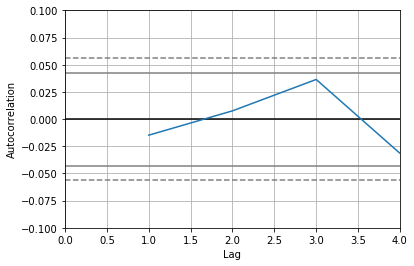

In [27]:
from pandas.plotting import autocorrelation_plot

#Auto Correlation Plot
ax = autocorrelation_plot(price_diff)
ax.set_xlim([0, 4])
ax.set_ylim([-0.1, +0.1])

# CREATE TRAIN AND TEST DATA FOR 15 DAYS PREDICTION

In [28]:
totalrowno = len(new_data)
#print(totalrowno)

X = new_data.values

# Split the data into training/testing sets
train = X[:(totalrowno-15)] 
test = X[(totalrowno-15):] 

print('X SHAPE ', X.shape)
print('TRAIN SHAPE ', train.shape)
print('TEST SHAPE ', test.shape)

X SHAPE  (2100, 1)
TRAIN SHAPE  (2085, 1)
TEST SHAPE  (15, 1)


# CREATE MODEL FOR 15 DAYS PREDICTION

In [29]:
from statsmodels.tsa.arima_model import ARIMA

#p,d,q  
#p -> periods taken for autoregressive model
#d -> Integrated order, difference
# q -> periods in moving average model
# order=(p, d, q)
# IF p is 1 IT will consider only previous month value
# IF p is 2 IT will consider only past two months value
# d is 1 means it will calculate difference only 1 by shifted down
# d is 2 means it will repeat 2 times
# Moving Average is 0
model_arima = ARIMA(train,order=(3, 1, 0))

model_arima_fit = model_arima.fit()

# Akaike Information Critera (AIC) is a widely used measure of a statistical model. 
# It basically quantifies 1) the goodness of fit and 2) the simplicity/parsimony of the model into a single statistic.
#When comparing two models, the one with the lower AIC is generally “better”. 

print(model_arima_fit.aic)

10871.981800918093


# 15 DAYS PREDICTION

In [30]:
#PREDICT PRICE
stcokclose_preds = model_arima_fit.forecast(steps=15)[0]

print(stcokclose_preds)

[212.66816858 212.83616914 212.87363062 212.92239292 212.96764643
 213.01134982 213.05517336 213.09892398 213.1426564  213.18638957
 213.23012146 213.27385313 213.31758479 213.36131644 213.40504808]


In [31]:
#Read Data from CSV file And Store It IN DATAFRAME
df_15days = pd.read_csv('NSE-TATAGLOBAL.csv')
df_15days.drop(columns=['Open', 'High', 'Low','Last','Total Trade Quantity','Turnover (Lacs)'], inplace=True, axis=1)
df_15days = df_15days[:15]
df_15days = df_15days.sort_values('Date')
df_15days['PClose'] = stcokclose_preds
df_15days.head(15)

,Date,Close,PClose
14,2018-12-14,212.35,212.668169
13,2018-12-17,210.05,212.836169
12,2018-12-18,210.10,212.873631
11,2018-12-19,210.15,212.922393
10,2018-12-20,210.20,212.967646
9,2018-12-21,215.40,213.011350
8,2018-12-24,219.05,213.055173
7,2018-12-26,218.55,213.098924
6,2018-12-27,220.05,213.142656
5,2018-12-28,220.80,213.186390


# ERROR CLACULATION

In [32]:
#calculate rmse
#MSE (Mean Squared Error) = np.mean((y_test - y_predtest)**2)
#RMSE (Root Mean Squared Error) = np.sqrt(MSE)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test,stcokclose_preds)
rmse = np.sqrt(mse)
rmse

4.417511306274188

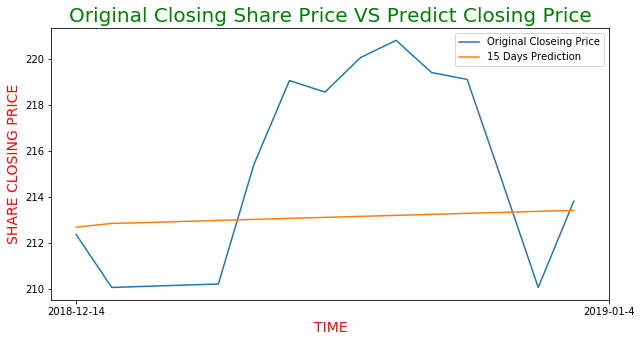

In [33]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(df_15days['Date'],df_15days['Close'], label='Original Closeing Price')
ax.plot(df_15days['Date'],df_15days['PClose'], label='15 Days Prediction')

ax.set_xlabel('TIME',fontsize=14, color='r')
ax.set_ylabel('SHARE CLOSING PRICE',fontsize=14, color='r')
ax.set_title('Original Closing Share Price VS Predict Closing Price', fontsize=20, color='g')
ax.get_xaxis().set_ticks(['2018-12-14','2019-01-4'])
ax.legend()

# CREATE TRAIN AND TEST DATA FOR 45 DAYS PREDICTION

In [34]:
totalrowno = len(new_data)
#print(totalrowno)

X = new_data.values

# Split the data into training/testing sets
train = X[:(totalrowno-45)] 
test = X[(totalrowno-45):] 

print('X SHAPE ', X.shape)
print('TRAIN SHAPE ', train.shape)
print('TEST SHAPE ', test.shape)

X SHAPE  (2100, 1)
TRAIN SHAPE  (2055, 1)
TEST SHAPE  (45, 1)


# CREATE MODEL FOR 45 DAYS PREDICTION

In [35]:
from statsmodels.tsa.arima_model import ARIMA

#p,d,q  
#p -> periods taken for autoregressive model
#d -> Integrated order, difference
# q -> periods in moving average model
# order=(p, d, q)
# IF p is 1 IT will consider only previous month value
# IF p is 2 IT will consider only past two months value
# d is 1 means it will calculate difference only 1 by shifted down
# d is 2 means it will repeat 2 times
# Moving Average is 0
model_arima = ARIMA(train,order=(3, 1, 0))

model_arima_fit = model_arima.fit()

# Akaike Information Critera (AIC) is a widely used measure of a statistical model. 
# It basically quantifies 1) the goodness of fit and 2) the simplicity/parsimony of the model into a single statistic.
#When comparing two models, the one with the lower AIC is generally “better”. 

print(model_arima_fit.aic)

10689.058672658877


# 45 DAYS PREDICTION

In [36]:
#PREDICT PRICE
stcokclose_preds = model_arima_fit.forecast(steps=45)[0]

stcokclose_preds.shape

(45,)

# ERROR CLACULATION

In [37]:
#calculate rmse
#MSE (Mean Squared Error) = np.mean((y_test - y_predtest)**2)
#RMSE (Root Mean Squared Error) = np.sqrt(MSE)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test,stcokclose_preds)
rmse = np.sqrt(mse)
rmse

14.764503890912692

In [38]:
#Read Data from CSV file And Store It IN DATAFRAME
df_45days = pd.read_csv('NSE-TATAGLOBAL.csv')
df_45days.drop(columns=['Open', 'High', 'Low','Last','Total Trade Quantity','Turnover (Lacs)'], inplace=True, axis=1)
df_45days = df_45days[:45]
df_45days = df_45days.sort_values('Date')
df_45days['PClose'] = stcokclose_preds
df_45days.head()

,Date,Close,PClose
44,2018-10-31,217.85,227.269995
43,2018-11-01,217.75,227.482999
42,2018-11-02,217.65,227.650498
41,2018-11-05,219.85,227.702690
40,2018-11-06,213.80,227.758827


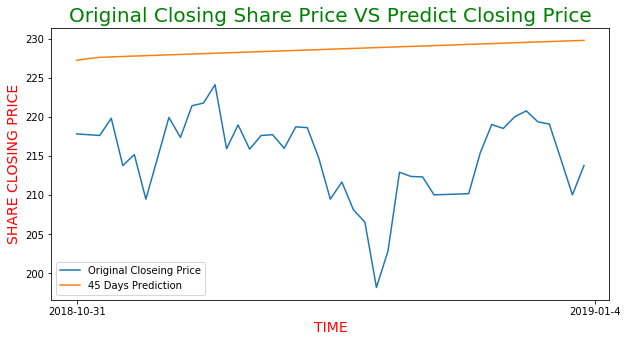

In [39]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(df_45days['Date'],df_45days['Close'], label='Original Closeing Price')
ax.plot(df_45days['Date'],df_45days['PClose'], label='45 Days Prediction')

ax.set_xlabel('TIME',fontsize=14, color='r')
ax.set_ylabel('SHARE CLOSING PRICE',fontsize=14, color='r')
ax.set_title('Original Closing Share Price VS Predict Closing Price', fontsize=20, color='g')
ax.get_xaxis().set_ticks(['2018-10-31','2019-01-4'])
ax.legend()

# CREATE TRAIN AND TEST DATA FOR 90 DAYS PREDICTION

In [40]:
totalrowno = len(new_data)
#print(totalrowno)

X = new_data.values

# Split the data into training/testing sets
train = X[:(totalrowno-90)] 
test = X[(totalrowno-90):] 

print('X SHAPE ', X.shape)
print('TRAIN SHAPE ', train.shape)
print('TEST SHAPE ', test.shape)

X SHAPE  (2100, 1)
TRAIN SHAPE  (2010, 1)
TEST SHAPE  (90, 1)


# CREATE MODEL FOR 90 DAYS PREDICTION

In [41]:
from statsmodels.tsa.arima_model import ARIMA

#p,d,q  
#p -> periods taken for autoregressive model
#d -> Integrated order, difference
# q -> periods in moving average model
# order=(p, d, q)
# IF p is 1 IT will consider only previous month value
# IF p is 2 IT will consider only past two months value
# d is 1 means it will calculate difference only 1 by shifted down
# d is 2 means it will repeat 2 times
# Moving Average is 0
model_arima = ARIMA(train,order=(3, 1, 0))

model_arima_fit = model_arima.fit()

# Akaike Information Critera (AIC) is a widely used measure of a statistical model. 
# It basically quantifies 1) the goodness of fit and 2) the simplicity/parsimony of the model into a single statistic.
#When comparing two models, the one with the lower AIC is generally “better”. 

print(model_arima_fit.aic)

10393.094305799446


# 90 DAYS PREDICTION

In [42]:
#PREDICT PRICE
stcokclose_preds = model_arima_fit.forecast(steps=90)[0]

stcokclose_preds.shape

(90,)

# ERROR CLACULATION

In [43]:
#calculate rmse
#MSE (Mean Squared Error) = np.mean((y_test - y_predtest)**2)
#RMSE (Root Mean Squared Error) = np.sqrt(MSE)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test,stcokclose_preds)
rmse = np.sqrt(mse)
rmse

24.191121963224855

In [44]:
#Read Data from CSV file And Store It IN DATAFRAME
df_90days = pd.read_csv('NSE-TATAGLOBAL.csv')
df_90days.drop(columns=['Open', 'High', 'Low','Last','Total Trade Quantity','Turnover (Lacs)'], inplace=True, axis=1)
df_90days = df_90days[:90]
df_90days = df_90days.sort_values('Date')
df_90days['PClose'] = stcokclose_preds
df_90days.head()

,Date,Close,PClose
89,2018-08-23,235.45,240.795499
88,2018-08-24,231.00,240.818000
87,2018-08-27,237.05,240.769524
86,2018-08-28,233.35,240.833964
85,2018-08-29,234.55,240.890267


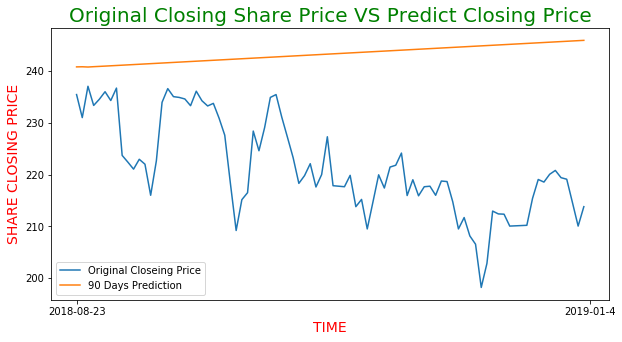

In [45]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(df_90days['Date'],df_90days['Close'], label='Original Closeing Price')
ax.plot(df_90days['Date'],df_90days['PClose'], label='90 Days Prediction')

ax.set_xlabel('TIME',fontsize=14, color='r')
ax.set_ylabel('SHARE CLOSING PRICE',fontsize=14, color='r')
ax.set_title('Original Closing Share Price VS Predict Closing Price', fontsize=20, color='g')
ax.get_xaxis().set_ticks(['2018-08-23','2019-01-4'])
ax.legend()